In [1]:
import json

with open("./data/thresholds_scores.json") as f:
    result = json.load(f)

In [2]:
from typing import *

def print_top(result: List[Tuple[Any, Any]], k=3):
    for i, t in enumerate(("accuracy", "precision", "recall")):
        sorted_list = reversed(sorted((r[1][i], r) for r in result))
        print(t, ":")
        for i, (_, r) in zip(range(k), sorted_list):
            print("\t", r)
        print()

    sorted_list = reversed(sorted((sum(list(r[1])), r) for r in result))
    print("sum:")
    for i, (_, r) in zip(range(k), sorted_list):
        print("\t", r)

    print()

In [3]:
print_top(result)

accuracy :
	 [[[['tokenization'], 0.4], [['abbreviation'], 0.4], [['sorted_fuzzy'], 0.8], [['fuzzy'], 0.6]], [0.9827881249423076, 0.9912919907684418, 0.9349315758711731]]
	 [[[['tokenization'], 0.4], [['abbreviation'], 0.4], [['sorted_fuzzy'], 1.0], [['fuzzy'], 0.6]], [0.9827833912032928, 0.9912918046799872, 0.9349114214886027]]
	 [[[['tokenization'], 0.4], [['abbreviation'], 0.4], [['sorted_fuzzy'], 0.9], [['fuzzy'], 0.6]], [0.9827833912032928, 0.9912918046799872, 0.9349114214886027]]

precision :
	 [[[['tokenization'], 0.7], [['sorted_fuzzy'], 0.9], [['fuzzy'], 0.9]], [0.8861275411302748, 0.9998826635376944, 0.5152367132232905]]
	 [[[['tokenization'], 0.7], [['sorted_fuzzy'], 1.0], [['fuzzy'], 0.9]], [0.8860210320024426, 0.9998825601879037, 0.5147832396154544]]
	 [[[['tokenization'], 0.7], [['fuzzy'], 0.9]], [0.8860068307853983, 0.9998825463941743, 0.5147227764677429]]

recall :
	 [[[['tokenization'], 1.0], [['abbreviation'], 0.4], [['sorted_fuzzy'], 0.4], [['partial_fuzzy'], 0.4], [

In [4]:
import matplotlib.pyplot as plt

In [5]:
# only interesting results
result = [r for r in result if all(r[1][i] > 0.8 for i in range(3))]


In [6]:
def show_plot():
    fig, ax = plt.subplots(5, 1, figsize=(8, 40))
    
    for i, parameter in enumerate(("abbreviation", "tokenization", "fuzzy", "partial_fuzzy", "sorted_fuzzy")):
        ax[i].grid(True, alpha=0.3)
        ax[i].set_xlabel('precision')
        ax[i].set_ylabel('recall')

        x = [r[1][1] for r in result]
        y = [r[1][2] for r in result]

        description = [dict((k[0], v) for k, v in r[0]) for r in result]

        group = [r.get(parameter, 1.1) * 10 for r in description]


        scatter = ax[i].scatter(x, y, c=group)
        legend1 = ax[i].legend(*scatter.legend_elements(),
                            loc="lower left", title=parameter)
        ax[i].add_artist(legend1)
    
    plt.show()



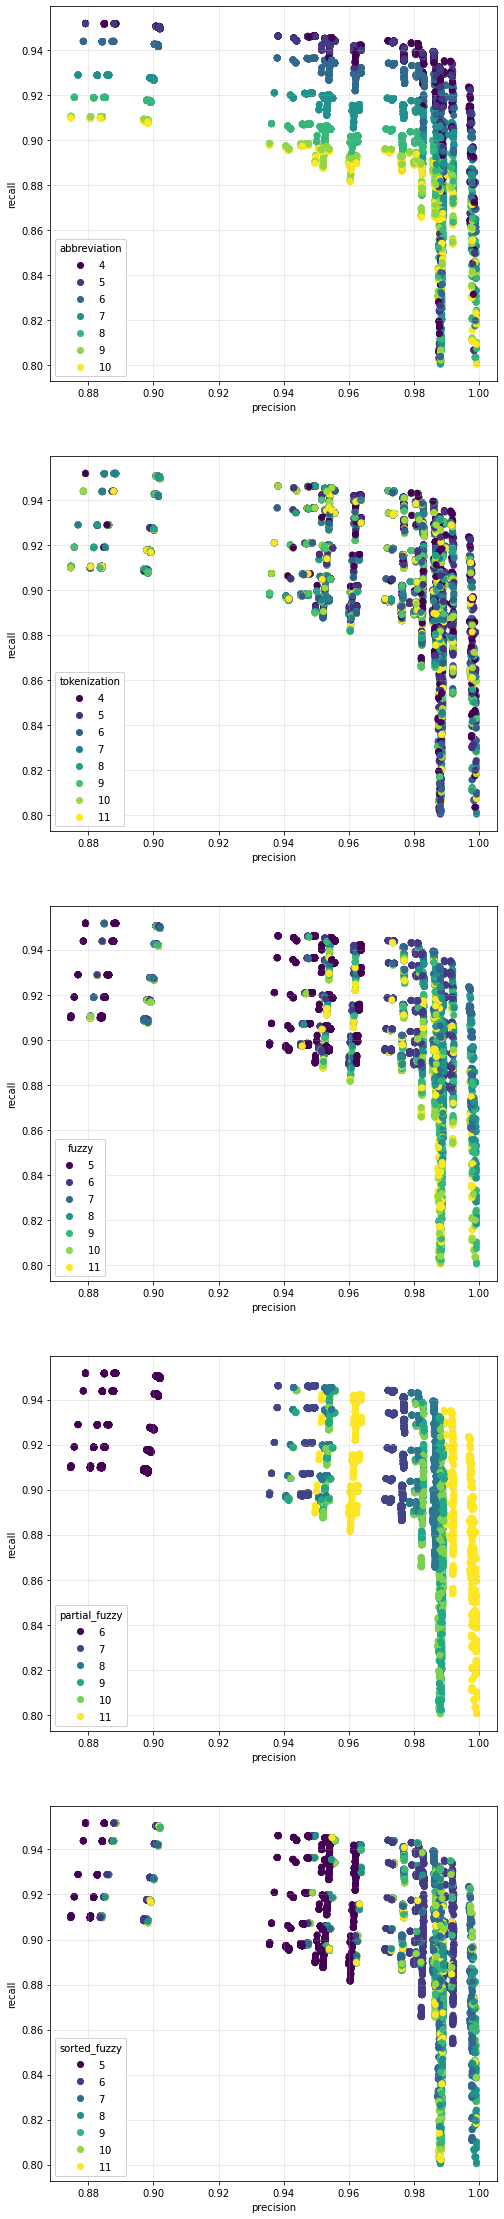

In [7]:
show_plot()